In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [12]:
from torchvision import datasets
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



batch_size = 100
# Download and load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

mask_1 = torch.Tensor(trainset.targets) == 1
mask_2 = torch.Tensor(trainset.targets) == 7
mask = mask_1 | mask_2
trainset = torch.utils.data.Subset(trainset, torch.where(mask)[0])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=3)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

mask_1 = torch.Tensor(testset.targets) == 1
mask_2 = torch.Tensor(testset.targets) == 7
mask = mask_1 | mask_2
testset = torch.utils.data.Subset(testset, torch.where(mask)[0])

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                          shuffle=True, num_workers=2)

classes = ('1', '7')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
len(trainset), len(testset)

(10000, 2000)

In [14]:
def change_label (label, n_0, n_1):
    mask_0, mask_1 = (label == n_0), (label == n_1)
    label[mask_0], label[mask_1] = 0, 1
    return label


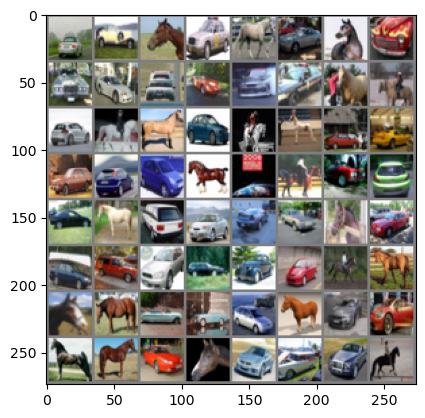

IndexError: tuple index out of range

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [15]:
device = torch.device("mps" if torch.backends.mps.is_available() else torch.device('cpu'))

In [16]:
device

device(type='mps')

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 80)
        self.fc2 = nn.Linear(80, 40)
        self.fc3 = nn.Linear(40, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [20]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [21]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        change_label(labels, 1, 7)
        # zero the parameter gradients
        optimizer.zero_grad()
        labels = labels.to(device)
        inputs = inputs.to(device)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.007
[1,   101] loss: 0.537
[2,     1] loss: 0.003
[2,   101] loss: 0.277
[3,     1] loss: 0.002
[3,   101] loss: 0.205
[4,     1] loss: 0.002
[4,   101] loss: 0.174
[5,     1] loss: 0.003
[5,   101] loss: 0.152
[6,     1] loss: 0.002
[6,   101] loss: 0.142
[7,     1] loss: 0.002
[7,   101] loss: 0.130
[8,     1] loss: 0.001
[8,   101] loss: 0.121
[9,     1] loss: 0.002
[9,   101] loss: 0.113
[10,     1] loss: 0.000
[10,   101] loss: 0.108
[11,     1] loss: 0.001
[11,   101] loss: 0.097
[12,     1] loss: 0.001
[12,   101] loss: 0.096
[13,     1] loss: 0.001
[13,   101] loss: 0.083
[14,     1] loss: 0.001
[14,   101] loss: 0.082
[15,     1] loss: 0.000
[15,   101] loss: 0.074
[16,     1] loss: 0.000
[16,   101] loss: 0.072
[17,     1] loss: 0.001
[17,   101] loss: 0.069
[18,     1] loss: 0.001
[18,   101] loss: 0.063
[19,     1] loss: 0.001
[19,   101] loss: 0.061
[20,     1] loss: 0.000
[20,   101] loss: 0.063
[21,     1] loss: 0.000
[21,   101] loss: 0.055
[22,     1

KeyboardInterrupt: 

In [22]:
# Assuming `model` is your PyTorch model

torch.save(net.state_dict(), 'reco/adam_100_world_ender_1.pth')

In [24]:
net = Net()
net.load_state_dict(torch.load("reco/adam_100_world_ender_1.pth"))

<All keys matched successfully>

In [25]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        change_label(labels, 1, 7)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %


In [26]:
correct

1956

In [27]:
total

2000